# Exploration_CR9 N2

## 1-1. 🐶 거울아 거울아, 나는 멍멍이 상이니, 아니면 냥이 상이니?

In [26]:
import warnings
warnings.filterwarnings("ignore")

print("완료!")

완료!


## 1-2. 내가 직접 만드는 강아지 고양이 분류기 (1) 이미지 분류 문제

In [27]:
import tensorflow as tf
print(tf.__version__)

2.6.0


## 1-3. 내가 직접 만드는 강아지 고양이 분류기 (2) 모델이 학습하려면? 공부할 데이터를 줘야지!

In [28]:
import tensorflow_datasets as tfds

tfds.__version__

'4.4.0'

In [29]:
(raw_train, raw_validation, raw_test), metadata = tfds.load(
    name='tf_flowers',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    data_dir='../',
    download=True,
    with_info=True,
    as_supervised=True,
)

In [30]:
print(raw_train)
print(raw_validation)
print(raw_test)

<PrefetchDataset shapes: ((None, None, 3), ()), types: (tf.uint8, tf.int64)>
<PrefetchDataset shapes: ((None, None, 3), ()), types: (tf.uint8, tf.int64)>
<PrefetchDataset shapes: ((None, None, 3), ()), types: (tf.uint8, tf.int64)>


각 데이터셋의 형태가 잘 출력되었군요.

모든 데이터셋은 (image, label)의 형태를 가집니다. ((None, None, 3), ())가 이를 나타내죠. 여기에서 앞에 있는 (None, None, 3)은 image의 shape를, 뒤의 ()는 정답 카테고리인 label의 shape를 의미합니다.

이미지는 (height, width, channel)로 3차원 데이터이기 때문에 (None, None, 3)과 같이 나타났습니다. 이때 height와 width가 None으로 나타난 이유는 무엇일까요?

잠시 뒤에 확인하겠지만, 모든 이미지의 크기가 전부 다르기 때문입니다. 정해져 있지 않은 사이즈이기 때문에 None으로 나타낸 거죠.

그렇다면 3이라는 숫자는 무엇을 나타낼까요?

이미지의 색을 표현하는 채널의 수를 나타냅니다. 컬러 이미지의 경우, 색은 RGB의 세 가지 색 조합으로 나타낼 수 있다는 것을 알고 있을 겁니다. 이미지를 컴퓨터상에 나타낼 때, 각 픽셀(pixel)의 색은 RGB의 세 가지 색의 조합으로 나타나기 때문에 컬러 이미지는 항상 3개의 채널을 가지고 있어야 하죠.
반면, 흑백 이미지는 white/black만 나타내면 되므로 단 하나의 채널만 있어도 충분합니다.

label은 특정 이미지가 강아지인지, 혹은 고양이인지를 나타내는 단일 값입니다. 단순히 1차원의 숫자 하나로 표현될 수 있기 때문에 차원이 따로 나타나지 않았습니다.

만약 label을 벡터로 바꿔야 한다면?
One-hot encoding 등을 사용하면 (2,)처럼 나타날 수 있음.
예: 고양이 → [1, 0], 강아지 → [0, 1]

## 1-4. 내가 직접 만드는 강아지 고양이 분류기 (3) 데이터가 있다고 끝은 아니야, 이쁘게 다듬는 작업은 필수!

In [31]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

print("슝~")

슝~


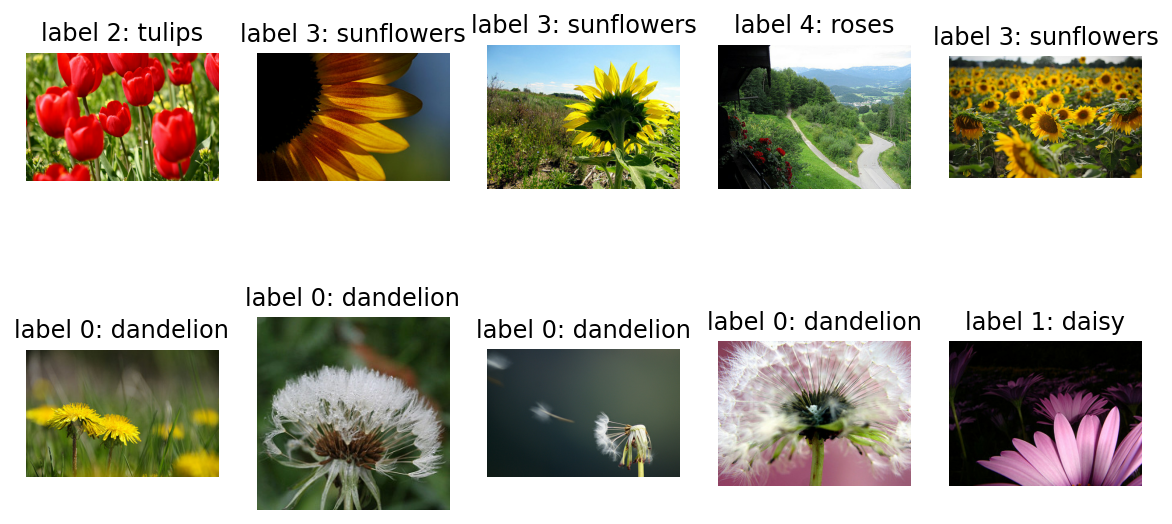

In [32]:
plt.figure(figsize=(10, 5))

get_label_name = metadata.features['label'].int2str

for idx, (image, label) in enumerate(raw_train.take(10)):  # 10개의 데이터를 가져 옵니다.
    plt.subplot(2, 5, idx+1)
    plt.imshow(image)
    plt.title(f'label {label}: {get_label_name(label)}')
    plt.axis('off')

In [33]:
IMG_SIZE = 160 # 리사이징할 이미지의 크기

def format_example(image, label):
    image = tf.cast(image, tf.float32)  # image=float(image)같은 타입캐스팅의  텐서플로우 버전입니다.
    image = (image/127.5) - 1 # 픽셀값의 scale 수정
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    return image, label

print("슝~")

슝~


In [34]:
train = raw_train.map(format_example)
validation = raw_validation.map(format_example)
test = raw_test.map(format_example)

print(train)
print(validation)
print(test)

<MapDataset shapes: ((160, 160, 3), ()), types: (tf.float32, tf.int64)>
<MapDataset shapes: ((160, 160, 3), ()), types: (tf.float32, tf.int64)>
<MapDataset shapes: ((160, 160, 3), ()), types: (tf.float32, tf.int64)>


Q8. 위에서 이미지를 확인했던 코드와 아래 코드는 어떻게 다를까요? 두 가지 부분을 찾아 설명해봅시다.

- raw_train을 train으로 바꾸었다.
- matplotlib으로 이미지를 시각화 할 경우에는 모든 픽셀값이 양수여야 하므로, -1~1 사이의 픽셀값을 1을 더한 후 2로 나눠서 0~1 사이의 값으로 변환하였다.

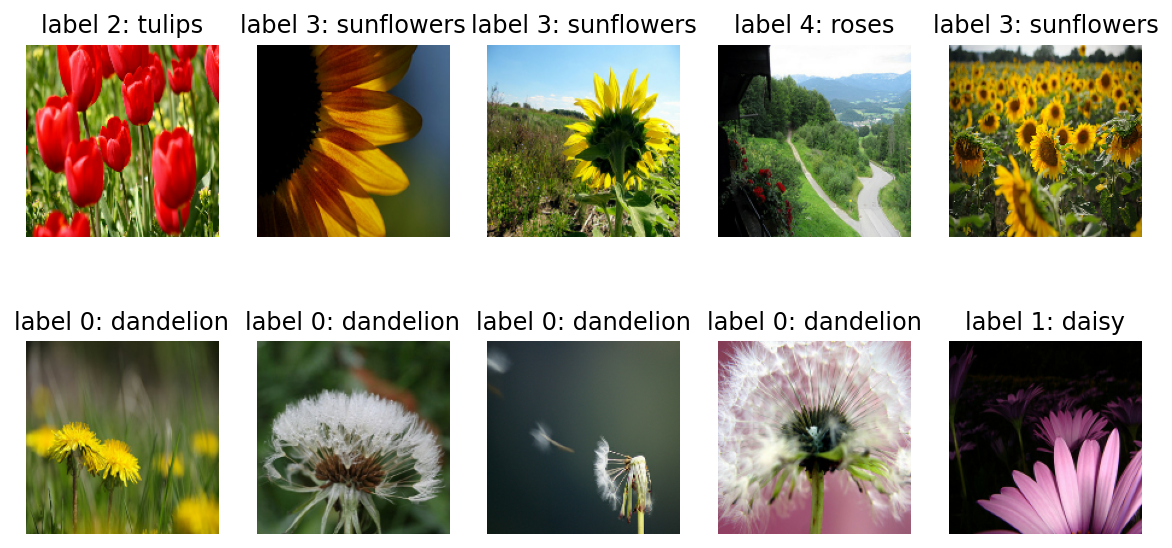

In [35]:
plt.figure(figsize=(10, 5))


get_label_name = metadata.features['label'].int2str

for idx, (image, label) in enumerate(train.take(10)):
    plt.subplot(2, 5, idx+1)
    image = (image + 1) / 2
    plt.imshow(image)
    plt.title(f'label {label}: {get_label_name(label)}')
    plt.axis('off')

Q. 픽셀값 스케일을 -1 ~ 1 로 바꿨는데 어떻게 이미지가 정상 출력되지?

plt.imshow()는 입력 이미지의 픽셀 값이 다음 범위 내에 있어야 올바르게 출력돼:
- 0 ~ 255 (uint8 데이터 타입)
- 0 ~ 1 (float 데이터 타입)


## 1-5. 내가 직접 만드는 강아지 고양이 분류기 (4) 데이터가 준비되었으니, 이제 모델을 만들어보자


In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D

print("슝~")

슝~


In [37]:
model = Sequential([
    Conv2D(filters=16, kernel_size=3, padding='same', activation='relu', input_shape=(160, 160, 3)),
    MaxPooling2D(),
    Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(units=512, activation='relu'),
    Dense(units=5, activation='softmax') # @ Dense 2->5로 변경(class갯수 반영)
])

print("슝~")

슝~


In [38]:

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 160, 160, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 80, 80, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 80, 80, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 40, 40, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 40, 40, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 20, 20, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 25600)            

첫 번째 차원은 데이터의 개수를 나타냅니다. 여기서는 정해지지 않은 수라는 None 기호로 표시되었네요. None은 배치(batch) 사이즈에 따라 모델에 다른 수의 입력이 들어올 수 있음을 나타냅니다.

데이터 하나의 크기는 (height, width, channel)로 3차원이죠. 6개의 레이어를 지나면서 height와 width는 점점 작아지고, channel은 점점 커지다가, flatten 계층을 만나 25,600(20x20x64)이라는 하나의 숫자로, 즉 1차원으로 shape가 줄어듭니다.

앞의 모델과 같이 점점 작은 feature map이 출력되다가, Flatten과 Dense 레이어를 거쳐 데이터가 1차원으로 줄어드는 네트워크는 CNN(Convolutional Neural Net)을 사용한 딥러닝 모델의 가장 대표적인 형태입니다.

In [39]:
# @ 모델 dropout
from tensorflow.keras.layers import Dropout

model = Sequential([
    Conv2D(filters=16, kernel_size=3, padding='same', activation='relu', input_shape=(160, 160, 3)),
    MaxPooling2D(),
    Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.25),  # 드롭아웃 추가
    Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.25),  # 드롭아웃 추가
    Flatten(),
    Dense(units=512, activation='relu'),
    Dropout(0.5),  # 완전 연결층 드롭아웃
    Dense(units=5, activation='softmax')  # 클래스 수 5개
])


## 1-6. 내가 직접 만드는 강아지 고양이 분류기 (5) 모델아 모델아, 데이터를 먹고 똑똑해지렴!

In [40]:
learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=learning_rate),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

print("슝~")

슝~


compile을 하기 위해서는 세 가지가 필요합니다. 바로 optimizer, loss, metrics 라는 친구들입니다.

optimizer는 학습을 어떤 방식으로 시킬 것인지 결정합니다. 어떻게 최적화시킬 것인지를 결정하기 때문에 최적화 함수라고 부르기도 합니다.
loss는 모델이 학습해나가야 하는 방향 을 결정합니다. 이 문제에서는 모델의 출력은 입력받은 이미지가 고양이인지 강아지인지에 대한 확률분포로 두었으므로, 입력 이미지가 고양이(label=0)일 경우 모델의 출력이 [1.0, 0.0]에 가깝도록, 강아지(label=1)일 경우 [0.0, 1.0]에 가까워지도록 하는 방향을 제시합니다.
metrics는 모델의 성능을 평가하는 척도 입니다. 분류 문제를 풀 때, 성능을 평가할 수 있는 지표는 정확도(accuracy), 정밀도(precision), 재현율(recall) 등이 있습니다. 여기서는 정확도를 사용했습니다.


Accuracy = (TP + TN) / (TP + FN + FP + TN)

In [41]:
BATCH_SIZE = 32
SHUFFLE_BUFFER_SIZE = 1000
print("슝~")

슝~


BATCH_SIZE에 따라 32개의 데이터를 랜덤으로 뿌려줄 train_batches, validation_batches, test_batches를 만들어 주겠습니다. train_batches는 모델이 끊임없이 학습될 수 있도록 전체 데이터에서 32개를 랜덤으로 뽑아 계속 제공해 줄 것입니다.






In [42]:
train_batches = train.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
validation_batches = validation.batch(BATCH_SIZE)
test_batches = test.batch(BATCH_SIZE)
print("슝~")

슝~


In [43]:
for image_batch, label_batch in train_batches.take(1):
    break

image_batch.shape, label_batch.shape

(TensorShape([32, 160, 160, 3]), TensorShape([32]))

image_batch의 shape는 (160, 160, 3)의 shape인 32개의 데이터가 존재한다는 뜻이다. 즉, 데이터 하나의 크기는 (160, 160, 3)이고, 그 개수가 32개이다.
label은 강아지이면 1, 고양이이면 0으로 정답 label을 나타내기 때문에 한 batch에 데이터가 32개라면 label은 0 또는 1의 32개의 숫자로만 구성된다.

아직 모델은 학습하기 전입니다.

본격적으로 모델을 학습시켜보기 전에, 초기 모델의 성능은 어떤지 확인해 보겠습니다. validation(검증)을 하기 위한 데이터셋인 validation_batches를 이용해 20번의 예측을 해 보고, 평균 loss와 평균 accuracy를 확인해 보겠습니다.






In [44]:
validation_steps = 10
#validation_batches = validation_batches.repeat()
loss0, accuracy0 = model.evaluate(validation_batches, steps=validation_steps)

print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

10/10 [==============================] - 1s 31ms/step - loss: 1.6272 - accuracy: 0.1500
initial loss: 1.63
initial accuracy: 0.15


그러면 10 epoch를 학습시켜서 정확도가 어떻게 변하는지 확인해 보겠습니다. 아래 코드는 학습 환경에 따라 약 10~20분 내외가 걸릴 수 있습니다. (colab P100 GPU 기준 약 7분 내외)


## 1-7. 내가 직접 만드는 강아지 고양이 분류기 (6) 모델은 얼마나 똑똑해졌을까? 확인해 보자!

training accuracy는 10 epoch를 진행하는 동안 꾸준히 증가한다. 마지막에는 거의 90%를 넘어서는 수치를 보인다.
반면, validation accuracy는 초반에 75%~80% 사이까지는 증가하지만 증가폭이 training dataset에 비해 매우 적고, 증가하는 양상도 불안정하다.
training accuracy는 현재 학습하는 데이터셋에 대한 정확도이기 때문에 모델의 구조나 데이터셋 등에 문제가 없다면 일반적으로 학습하면 할수록 꾸준히 계속 오른다. 반면 validation accuracy는 학습하지 않은 데이터셋에 대한 정확도이기 때문에 일정수준까지 오른 후에는 계속 오를지 장담할 수 없다.

In [47]:
for image_batch, label_batch in test_batches.take(1):
    images = image_batch
    labels = label_batch
    predictions = model.predict(image_batch)
    break

predictions

array([[0.23244666, 0.25114244, 0.2094577 , 0.1856672 , 0.12128595],
       [0.22084996, 0.23038657, 0.20689715, 0.18633568, 0.15553062],
       [0.22063331, 0.25575635, 0.20970243, 0.16916892, 0.14473896],
       [0.27693182, 0.2380802 , 0.17774282, 0.17249261, 0.13475256],
       [0.26244903, 0.23040584, 0.19168468, 0.19408296, 0.12137751],
       [0.22840594, 0.2552961 , 0.17987937, 0.19124728, 0.14517127],
       [0.220636  , 0.23699471, 0.19965836, 0.19195777, 0.15075321],
       [0.24605754, 0.25691342, 0.20542085, 0.17310977, 0.11849838],
       [0.23115245, 0.22990635, 0.19336703, 0.1909014 , 0.15467279],
       [0.22663544, 0.22157864, 0.19372351, 0.19764869, 0.16041376],
       [0.20052135, 0.25748235, 0.19063312, 0.21491182, 0.13645135],
       [0.21907347, 0.2315268 , 0.19011603, 0.21944594, 0.13983779],
       [0.239015  , 0.23119071, 0.19585328, 0.19814962, 0.13579135],
       [0.23251273, 0.2455181 , 0.19419114, 0.17273651, 0.15504156],
       [0.20590152, 0.22908318, 0.

In [48]:
import numpy as np

In [49]:
predictions = np.argmax(predictions, axis=1)
predictions

array([1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1])

In [50]:
count = 0   # 정답을 맞춘 개수
for image, label, prediction in zip(images, labels, predictions):
    correct = label == prediction
    if correct: count += 1

print(count / 32 * 100)

18.75


## 1-8. 내가 직접 만들지 않고 가져다 쓰는 강아지 고양이 분류기 (1) 어려운 문제는 직접 풀지 말자, 똑똑한 누군가가 이미 풀어놨을 테니!

- **Fine-tuning의 세 가지 전략**
    1. 전체 모델을 새로 학습시키기
    2. Convolutional base의 일부분은 고정시킨 상태로, 나머지 계층과 classifier를 새로 학습시키기
    3. Convloutional base는 고정시키고, classifier만 새로 학습시키기

CNN 베이스의 사전학습 모델을 사용할 때에는, 이전에 학습한 내용들을 모두 잊어버릴 위험이 있기 때문에 `작은 learning rate`를 사용하는 것이 바람직합니다. 사전학습 모델이 잘 학습되었다는 가정하에, 작은 learning rate으로 학습을 시킨다면 CNN 모델의 파라미터들을 너무 빠르게, 혹은 너무 많이 왜곡시키지 않고 원래 학습되어있던 지식을 잘 보존하면서 추가로 학습을 해 나갈 것입니다.

- 전이학습의 전체 과정
    1. 사전학습 모델 선택
    2. 내 문제가 `데이터크기-유사성` 그래프에서 어떤 부분에 속하는지 알아보기
    3. 내 모델을 Fine-tuning 하기

우리가 사용해 볼 모델은 ILSVRC에서 쓰인 모델로, 해당 대회는 수백 만 장의 데이터로 학습된 모델이다. 그에 비해 우리가 새로 학습시킬 데이터는 강아지와 고양이는 `약 2만 장`으로, `비교적 매우 작은 데이터셋`이다. 따라서 모델을 새로 학습시키기보다는, 가져오는 모델은 이미지에서 특징을 추출하는 메커니즘으로 활용하고, classifier만 새로 학습시키는 `전략 3`이 적절하다.

## 1-9. 내가 직접 만들지 않고 가져다 쓰는 강아지 고양이 분류기 (2) 아주 똑똑한 모델을 간단히 가져오는 방법

우리는 2014년의 ILSVRC 물체 위치 찾기(localization) 태스크에서 우승한 VGG 모델을 사용해 보겠습니다.
2014년 이후 뛰어난 성능을 보이는 다양한 새로운 모델이 개발되었지만, VGG는 단순한 구조임에도 꽤나 괜찮은 성능을 보여서 아직까지 많은 이미지 처리 분야에서 사랑받는 모델 중 하나입니다.

다음의 간단한 코드로 VGG 모델을 base_model의 변수로 불러오겠습니다. 이전 스텝에 언급한 대로, VGG 모델을 가져올 때, output에 가까운 높은 레벨에 있는 3개의 FC 레이어는 제외하고 불러와야 하므로 include_top=False 옵션을 주었다는 것을 눈여겨 봐주세요.

In [59]:
# @ EfficientNetB0 
from tensorflow.keras.applications import EfficientNetB0
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)

# @ Create the base model from the pre-trained model EfficientNetB0
base_model_effi = tf.keras.applications.EfficientNetB0(input_shape=IMG_SHAPE,
                                         include_top=False,
                                         weights='imagenet')

In [60]:
image_batch.shape

TensorShape([32, 160, 160, 3])

In [61]:
feature_batch = base_model_effi(image_batch) # @ EfficientNetB0
feature_batch.shape

TensorShape([32, 5, 5, 1280])

In [62]:
base_model_effi.summary() # @ EfficientNetB0

Model: "efficientnetb0"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 160, 160, 3) 0                                            
__________________________________________________________________________________________________
rescaling_3 (Rescaling)         (None, 160, 160, 3)  0           input_4[0][0]                    
__________________________________________________________________________________________________
normalization_3 (Normalization) (None, 160, 160, 3)  7           rescaling_3[0][0]                
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 161, 161, 3)  0           normalization_3[0][0]            
_____________________________________________________________________________________

Q. VGG16 모델에는 총 네 가지 종류의 레이어만 쓰였습니다. 각각의 레이어는 무엇입니까?

Conv(Convolutional layer), Pooling(MaxPooling layer), Dense(Fully connected layer), softmax layer

Q. VGG16 모델은 총 5개의 Conv-pooling 블록과 1개의 Dense 블록으로 구성되어 있습니다. 각 블록은 몇 개의 레이어로 구성되어 있습니까?

- 첫 번째 블록 : 2개의 Conv 레이어와 1개의 Pooling 레이어
- 두 번째 블록 : 2개의 Conv 레이어와 1개의 Pooling 레이어
- 세 번째 블록 : 3개의 Conv 레이어와 1개의 Pooling 레이어
- 네 번째 블록 : 3개의 Conv 레이어와 1개의 Pooling 레이어
- 다섯 번째 블록 : 3개의 Conv 레이어와 1개의 Pooling 레이어
- 여섯 번째 블록 : 3개의 Dense 레이어

Q. 하지만 우리가 위에서 가져온 모델의 model.summary() 를 보면 무언가가 빠져있습니다. 어떤 블록이 빠졌으며, 왜 빠졌을까요?

마지막의 Dense 레이어로 이루어진 블록이 빠졌다. 이 블록은 우리가 Transfer Learning을 수행하며 새로 학습시킬 것이기 때문에 빠진 부분이다.

## 1-10. 내가 직접 만들지 않고 가져다 쓰는 강아지 고양이 분류기 (3) 모델의 마지막 부분만, 내 입맛대로 재구성하기

In [63]:
feature_batch.shape

TensorShape([32, 5, 5, 1280])

2차원의 이미지를 flatten하면 위와 같이 1차원의 이미지로 쭉 펼 수 있었습니다.

하지만 이번에는 조금 다른 방법을 사용할 것입니다. 2차원 또는 3차원 벡터를 1차원으로 축소하는 방법에는 Flattening 하는 것보다 조금 더 좋은 방법이 있거든요.

그 방법은 바로 Global Average Pooling 입니다. 

In [64]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
print("슝~")

슝~


In [65]:
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(32, 1280)


Q.주석을 참고해서 2개의 Dense Layer를 만드는 코드를 작성하세요.
(hint : Tensorflow Document에서 Dense Layer에 관련된 내용을 참고하세요. https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense)






In [66]:
# dense layer에는 unit과 activation 2개의 매개변수만 사용해주세요.
# unit의 값은 위에서 global_average_layer를 통과했을 때의 값을 생각해보세요.
# 활성화 함수는 ReLU를 사용합니다.
# 
# units	Positive integer, dimensionality of the output space.
# activation	Activation function to use. If you don't specify anything, no activation is applied (ie. "linear" activation: a(x) = x).
# 
# [[YOUR CODE]]
dense_layer = tf.keras.layers.Dense(
    units=feature_batch_average.shape[-1],
    activation='relu'
    )

# unit은 우리가 분류하고 싶은 class를 생각해보세요.
# 활성화 함수는 Softmax를 사용합니다.
# 
# [[YOUR CODE]]
prediction_layer = tf.keras.layers.Dense(
    units=5,   # @ 2->5로 수정
    activation='softmax'
    )

# feature_batch_averag가 dense_layer를 거친 결과가 다시 prediction_layer를 거치게 되면
prediction_batch = prediction_layer(dense_layer(feature_batch_average))  
print(prediction_batch.shape)

(32, 5)


우리의 데이터들은 처음에 이미지에서 특징을 추출해 줄 VGG16, base_model에 입력되어 특징이 추출된 다음, 그 특징 벡터는 global_average_layer를 거쳐 마지막에 prediction_layer까지 통과하며 강아지인지, 고양이인지 예측이 될 것입니다.

여기에서, VGG16에 해당하는 base_model은 학습을 시키지 않을 예정이니 학습 여부를 결정하는 trainable 변수를 False로 지정해 "꺼주겠"습니다.

In [85]:
base_model_effi.trainable = True  # @ EfficientNetB0 - True
print("슝~")

슝~


In [86]:
model = tf.keras.Sequential([
  base_model_effi,   # @ EfficientNetB0
  global_average_layer,
  dense_layer,
  prediction_layer
])
print("슝~")

슝~


In [87]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
efficientnetb0 (Functional)  (None, 5, 5, 1280)        4049571   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 1280)              1639680   
_________________________________________________________________
dense_9 (Dense)              (None, 5)                 6405      
Total params: 5,695,656
Trainable params: 5,653,633
Non-trainable params: 42,023
_________________________________________________________________


## 1-11. 내가 직접 만들지 않고 가져다 쓰는 강아지 고양이 분류기 (4) 거인의 어깨에 올라타서 예측하니, 더 잘 예측할 수밖에!

In [88]:
base_learning_rate = 0.00001 # @ 수정
# [[YOUR CODE]] learning_rate를 base_learning_rate로, Adam
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

자, 그러면 위에서 했던 것처럼 초기 손실과 정확도 값을 확인해 봅시다.

아직 학습이 되지 않은 상태니, 50% 정도를 예상해볼 수 있겠어요!

In [89]:
validation_steps=10   # @ 20 -> 10 으로 수정
loss0, accuracy0 = model.evaluate(validation_batches, steps = validation_steps)

print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

10/10 [==============================] - 2s 41ms/step - loss: 1.5077 - accuracy: 0.3281
initial loss: 1.51
initial accuracy: 0.33


In [90]:
# Q. 직접 모델을 학습하는 코드를 작성하세요.

EPOCHS = 5   # 이번에는 이전보다 훨씬 빠르게 수렴되므로 5Epoch이면 충분합니다.
# [[YOUR CODE]]
history = model.fit(train_batches,
                    epochs=EPOCHS,
                    validation_data=validation_batches)

Epoch 1/5
92/92 [==============================] - 26s 181ms/step - loss: 1.4071 - accuracy: 0.4455 - val_loss: 1.6127 - val_accuracy: 0.2425
Epoch 2/5
92/92 [==============================] - 17s 177ms/step - loss: 1.0445 - accuracy: 0.6666 - val_loss: 1.6659 - val_accuracy: 0.2643
Epoch 3/5
92/92 [==============================] - 17s 182ms/step - loss: 0.8347 - accuracy: 0.7476 - val_loss: 1.7887 - val_accuracy: 0.2480
Epoch 4/5
92/92 [==============================] - 17s 178ms/step - loss: 0.7007 - accuracy: 0.7803 - val_loss: 1.7473 - val_accuracy: 0.2943
Epoch 5/5
92/92 [==============================] - 17s 178ms/step - loss: 0.6009 - accuracy: 0.8208 - val_loss: 1.3595 - val_accuracy: 0.4741


In [91]:
# @ Epoch 늘려서 (5 + 10)

EPOCHS = 10
history = model.fit(train_batches,
                    epochs=EPOCHS,
                    validation_data=validation_batches)

Epoch 1/10
92/92 [==============================] - 17s 176ms/step - loss: 0.5168 - accuracy: 0.8454 - val_loss: 0.9828 - val_accuracy: 0.6839
Epoch 2/10
92/92 [==============================] - 17s 180ms/step - loss: 0.4690 - accuracy: 0.8484 - val_loss: 0.7153 - val_accuracy: 0.7738
Epoch 3/10
92/92 [==============================] - 17s 179ms/step - loss: 0.4165 - accuracy: 0.8706 - val_loss: 0.5885 - val_accuracy: 0.8311
Epoch 4/10
92/92 [==============================] - 17s 180ms/step - loss: 0.3765 - accuracy: 0.8849 - val_loss: 0.4420 - val_accuracy: 0.8719
Epoch 5/10
92/92 [==============================] - 17s 176ms/step - loss: 0.3426 - accuracy: 0.8907 - val_loss: 0.3819 - val_accuracy: 0.8774
Epoch 6/10
92/92 [==============================] - 17s 178ms/step - loss: 0.3075 - accuracy: 0.9026 - val_loss: 0.3608 - val_accuracy: 0.8774
Epoch 7/10
92/92 [==============================] - 17s 177ms/step - loss: 0.2869 - accuracy: 0.9091 - val_loss: 0.3462 - val_accuracy: 0.8774

In [43]:
# @ Epoch 늘려서 (5 + 10 +5)

EPOCHS = 5
history = model.fit(train_batches,
                    epochs=EPOCHS,
                    validation_data=validation_batches)

Epoch 1/5
92/92 [==============================] - 8s 85ms/step - loss: 0.4561 - accuracy: 0.8484 - val_loss: 0.5081 - val_accuracy: 0.8174
Epoch 2/5
92/92 [==============================] - 8s 85ms/step - loss: 0.4459 - accuracy: 0.8580 - val_loss: 0.4903 - val_accuracy: 0.8365
Epoch 3/5
92/92 [==============================] - 8s 85ms/step - loss: 0.4365 - accuracy: 0.8576 - val_loss: 0.5000 - val_accuracy: 0.8147
Epoch 4/5
92/92 [==============================] - 8s 85ms/step - loss: 0.4287 - accuracy: 0.8621 - val_loss: 0.5178 - val_accuracy: 0.8093
Epoch 5/5
92/92 [==============================] - 8s 84ms/step - loss: 0.4224 - accuracy: 0.8617 - val_loss: 0.4759 - val_accuracy: 0.8338


와, 최종 정확도를 좀 보세요! 90%를 넘어섰습니다.

그래프로 학습 과정을 살펴봅시다.

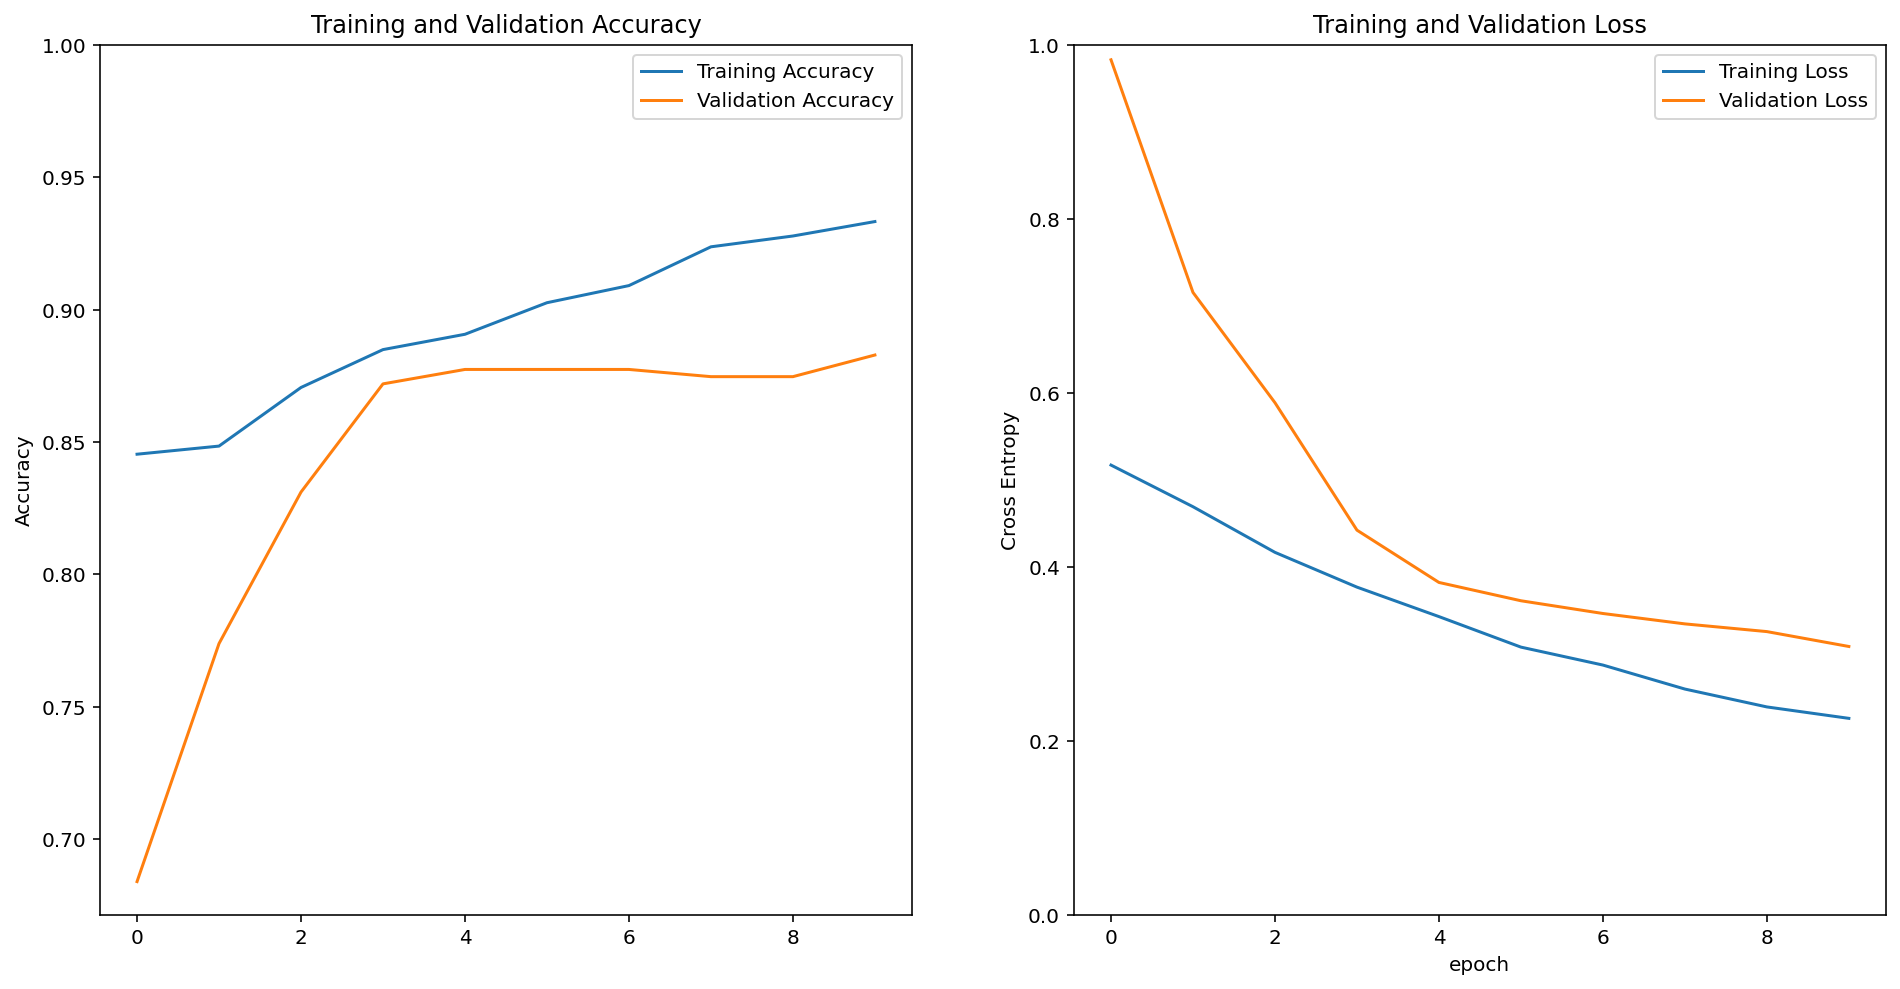

In [92]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='upper right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [95]:
# @ 테스트 정확도 확인 (EfficientNetB0)
test_loss, test_accuracy = model.evaluate(test_batches) # @ test accuracy
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

12/12 [==============================] - 1s 51ms/step - loss: 0.2904 - accuracy: 0.8965
Test Loss: 0.2904
Test Accuracy: 0.8965


In [78]:
for images, labels in train_batches.take(1):
    print(labels.dtype)
    print(labels.numpy())

<dtype: 'int64'>
[0 2 2 0 2 1 0 3 0 2 0 2 3 2 0 1 1 0 1 0 0 3 4 1 2 0 3 2 3 2 1 0]


In [79]:
# 전처리된 이미지 확인
for images, labels in train_batches.take(1):
    print(images.numpy().min(), images.numpy().max())

-1.0 1.0


In [80]:
# 데이터셋 구조 확인
print(train_batches.element_spec)

(TensorSpec(shape=(None, 160, 160, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))


In [82]:
# 클래스별 데이터 수 확인
import numpy as np

label_list = []
for images, labels in train_batches:
    label_list.extend(labels.numpy())

unique, counts = np.unique(label_list, return_counts=True)
print(dict(zip(unique, counts)))

{0: 739, 1: 513, 2: 613, 3: 561, 4: 510}


우리가 직접 만들었던 모델과는 다르게 시작부터 75%를 넘는 정확도에서 꾸준히 올라갈뿐더러 validation loss도 매우 안정적으로 학습됩니다.
역시, 잘 학습된 모델을 가져와서 쓰는 게 최고군요!

위에서 했던 것과 같이 또 32개의 test sample에 대한 예측 결과를 눈으로도 확인해 보겠습니다.
샘플을 test_batches에서 가져와서 예측 결과를 만들어보죠!

In [45]:
for image_batch, label_batch in test_batches.take(1):
    images = image_batch
    labels = label_batch
    predictions = model.predict(image_batch)
    pass

predictions

array([[9.5494799e-03, 2.9294245e-02, 8.3900094e-01, 1.9359950e-02,
        1.0279544e-01],
       [9.9970287e-01, 2.6371234e-04, 9.7678401e-07, 1.1564224e-05,
        2.0807944e-05],
       [7.8638941e-01, 9.3829595e-02, 2.0198405e-02, 7.9180367e-02,
        2.0402215e-02],
       [1.0871342e-03, 5.1735169e-03, 6.1634600e-01, 2.7433792e-03,
        3.7464994e-01],
       [7.4099052e-01, 2.1941434e-01, 1.0597774e-02, 9.0598976e-03,
        1.9937452e-02],
       [9.5159447e-01, 3.1746943e-02, 2.4543556e-03, 1.3077071e-02,
        1.1272542e-03],
       [3.6854700e-03, 5.2339570e-03, 9.1337085e-01, 4.7228765e-02,
        3.0480975e-02],
       [4.8495993e-01, 4.4129205e-01, 5.7226466e-04, 7.0824906e-02,
        2.3508396e-03],
       [5.6755044e-03, 6.8552681e-04, 2.2371663e-02, 9.1030824e-01,
        6.0958996e-02],
       [9.9967825e-01, 2.9852364e-04, 1.9792672e-07, 2.1802714e-05,
        1.1507838e-06],
       [9.7960061e-01, 1.7333316e-02, 3.7819639e-04, 1.8536947e-03,
        8.34

역시 0과 1 사이의 값으로 확률값을 출력하였습니다.

이번에도 prediction 값들을 실제 추론한 라벨(고양이:0, 강아지:1)로 변환해 보겠습니다.

In [46]:
import numpy as np
predictions = np.argmax(predictions, axis=1)
predictions

array([2, 0, 0, 2, 0, 0, 2, 0, 3, 0, 0, 3, 3, 4, 0, 3, 2, 0, 2, 4, 2, 0,
       2, 0, 1, 3, 2, 4, 4, 3, 0, 4])

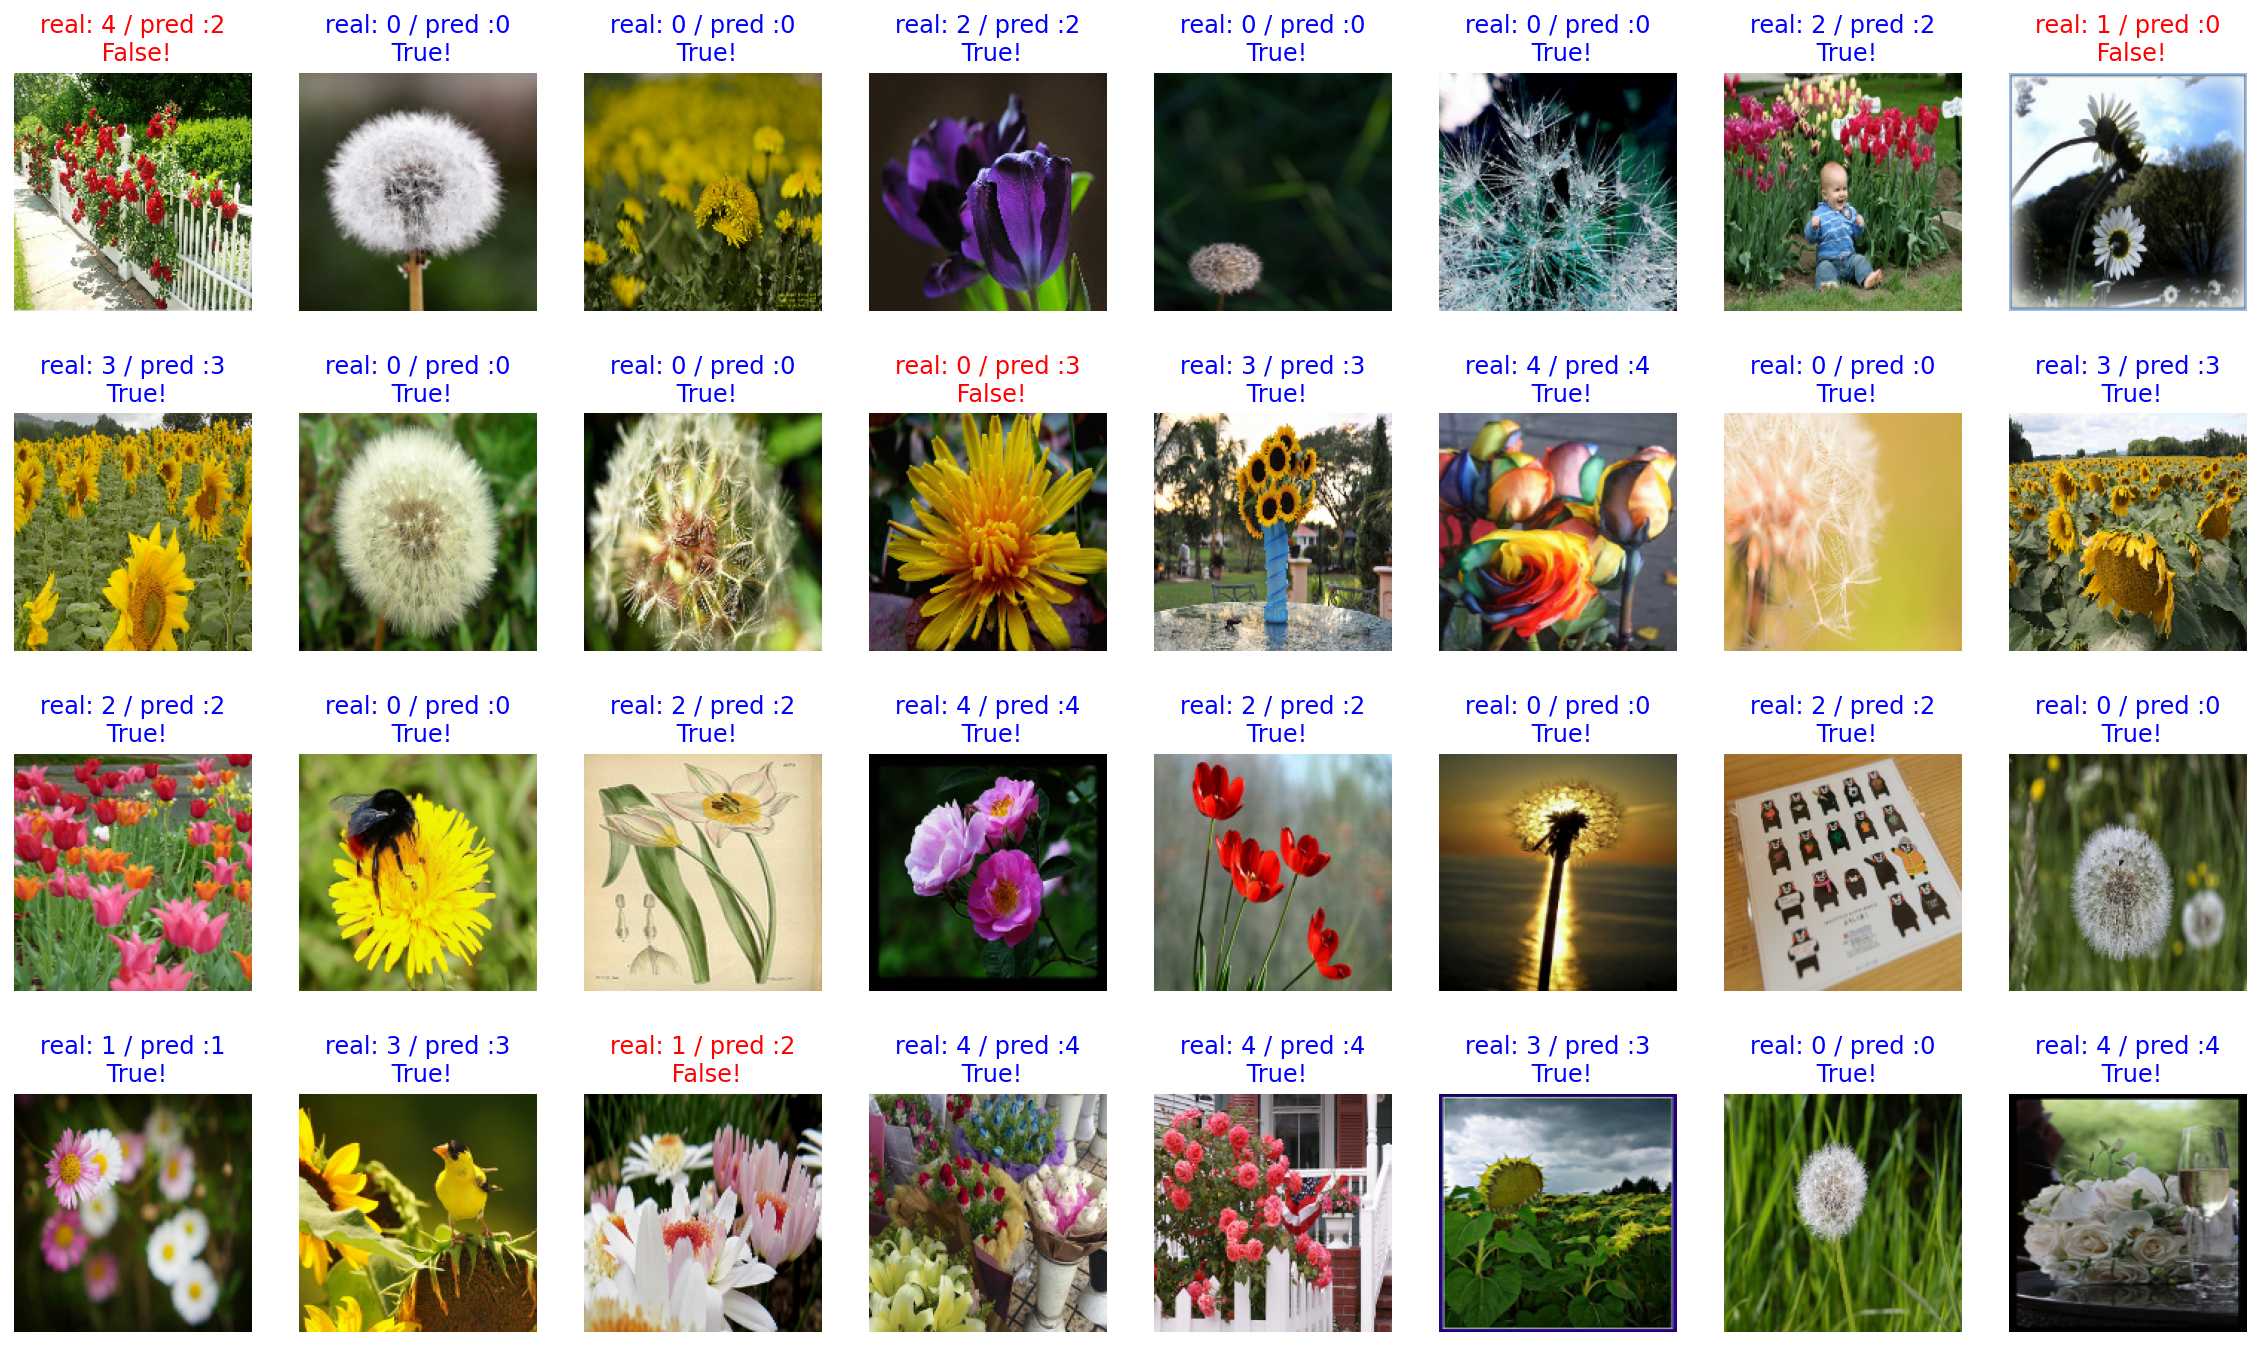

In [47]:
plt.figure(figsize=(20, 12))

for idx, (image, label, prediction) in enumerate(zip(images, labels, predictions)):
    plt.subplot(4, 8, idx+1)
    image = (image + 1) / 2
    plt.imshow(image)
    correct = label == prediction
    title = f'real: {label} / pred :{prediction}\n {correct}!'
    if not correct:
        plt.title(title, fontdict={'color': 'red'})
    else:
        plt.title(title, fontdict={'color': 'blue'})
    plt.axis('off')

In [48]:
count = 0
for image, label, prediction in zip(images, labels, predictions):
    correct = label == prediction
    if correct:
        count = count + 1

print(count / 32 * 100) # 약 95% 내외

87.5


## 1-12. 내가 직접 만들지 않고 가져다 쓰는 강아지 고양이 분류기 (5) 잘 학습된 모델은 저장해두고, 언제든 꺼내 쓰도록 하자!

다음과 같이 save_weights 함수를 활용합니다. 파라미터로 저장하고 싶은 경로만 입력해주면 되죠!

다음과 같이 ./checkpoint/checkpoint 라는 경로로 저장하게 되면 현재 위치에 있는 checkpoint라는 폴더 내에 checkpoint라는 파일명으로 저장됩니다.

단, checkpoint 폴더가 존재하지 않는다면 에러가 발생하므로, 다음과 같이 터미널을 열어 해당 폴더를 만들어주는 것이 안전합니다.
물론 다른 경로에, 다른 이름으로 저장해도 됩니다!

In [49]:
!mkdir -p ~/aiffel/exploration_01/checkpoint
!mkdir -p ~/aiffel/exploration_01/images

In [50]:
import os

checkpoint_dir = os.getenv("HOME") + "/aiffel/exploration_01/checkpoint"
checkpoint_file_path = os.path.join(checkpoint_dir, 'checkpoint')

if not os.path.exists('checkpoint_dir'):
    os.mkdir('checkpoint_dir')
    
model.save_weights(checkpoint_file_path)     # checkpoint 파일 생성

if os.path.exists(checkpoint_file_path):
  print('checkpoint 파일 생성 OK!!')

checkpoint 파일 생성 OK!!


In [51]:
model.save("vgg16_based_model.h5")

## 1-13. 내가 직접 만들지 않고 가져다 쓰는 강아지 고양이 분류기 (6) 거울아 거울아, 나는 멍멍이 상이니, 아니면 냥이 상이니?

프리픽(Freepik)에서 구해온 강아지와 고양이의 이미지를 넣어보도록 하겠습니다. 잘 맞출지, 기대가 되는군요! 아래 명령어를 통해 준비된 이미지를 연결해 주세요.

In [99]:
!ln -s ~/data/* ~/aiffel/cat_vs_dog/images/

ln: failed to create symbolic link '/aiffel/aiffel/cat_vs_dog/images/cat_face.jpg': File exists
ln: failed to create symbolic link '/aiffel/aiffel/cat_vs_dog/images/cats_vs_dogs': File exists
ln: failed to create symbolic link '/aiffel/aiffel/cat_vs_dog/images/my_cat.jpg': File exists
ln: failed to create symbolic link '/aiffel/aiffel/cat_vs_dog/images/my_dog.jpg': File exists


이미지 파일이 준비 되었다면, 이제 tensorflow 모델에 입력해주기 위해 load_img, img_to_array 함수를 가져오도록 하겠습니다.

In [100]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

이제 이미지를 가져와보죠!
단, 우리의 모델은 위에서 설정했다시피 (160, 160) 사이즈만 입력받을 수 있기 때문에 파라미터로 이미지 사이즈를 넣어주어야 합니다.

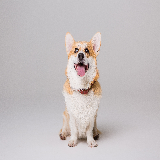

In [101]:
IMG_SIZE = 160
img_dir_path = os.getenv("HOME") + "/aiffel/cat_vs_dog/images"
dog_image_path = os.path.join(img_dir_path, 'my_dog.jpg')

dog_image = load_img(dog_image_path, target_size=(IMG_SIZE, IMG_SIZE))
dog_image

네, 이미지도 잘 가져왔고, 사이즈도 적당히 맞춰진 것 같군요!
그러면 이제 모델에 넣을 수 있도록 이미지를 array, 즉 배열 자료형으로 변환해주겠습니다.

In [102]:
dog_image = img_to_array(dog_image).reshape(1, IMG_SIZE, IMG_SIZE, 3)
dog_image.shape

(1, 160, 160, 3)

위에서 많이 사용했던 이미지 데이터의 shape와 같죠? 다만, 이번에는 이미지가 단 한 장이니 맨 앞의 숫자가 1이 됩니다.

그러면 이미지를 모델에 넣어 예측해볼까요?!
고양이라면 [1.0, 0.0], 강아지라면 [0.0, 1.0]에 가까운 확률 분포가 예측될 것입니다. 결과는 어떨까요?

In [103]:
prediction = model.predict(dog_image)
prediction

array([[5.1676138e-21, 1.0000000e+00]], dtype=float32)

강아지일 확률이 아주 확고한 1.0이군요. 너무 쉬운가봅니다.

위의 과정을 함수로 만들어 원하는 이미지를 자유자재로 예측해 보도록 하겠습니다.

In [112]:
def show_and_predict_image(dirpath, filename, img_size=160):
    filepath = os.path.join(dirpath, filename)
    image = load_img(filepath, target_size=(img_size, img_size))
    plt.imshow(image)
    plt.axis('off')
    image = img_to_array(image).reshape(1, img_size, img_size, 3)
    prediction = model.predict(image)[0]
#     cat_percentage = round(prediction[0] * 100)
#     dog_percentage = round(prediction[1] * 100)
    cat_percentage = prediction[0] * 100
    dog_percentage = prediction[1] * 100
    print(f"This image seems {dog_percentage}% dog, and {cat_percentage}% cat.")

위와 같이 함수를 짜두면 filename만 바꾸어 원하는대로 실험해볼 수 있습니다.

강아지 이미지를 함수에 넣어봅시다.

This image seems 100.0% dog, and 5.1676137752947055e-19% cat.


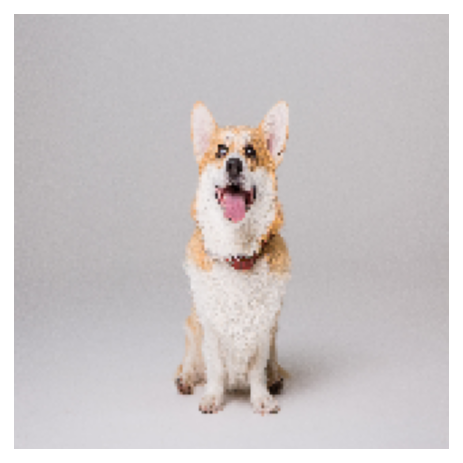

In [113]:
filename = 'my_dog.jpg'

show_and_predict_image(img_dir_path, filename)

This image seems 0.0% dog, and 100.0% cat.


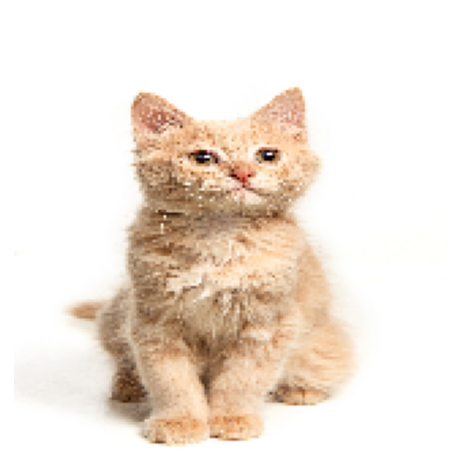

In [114]:
filename = 'my_cat.jpg'

show_and_predict_image(img_dir_path, filename)

This image seems 100.0% dog, and 0.0% cat.
/aiffel/aiffel/cat_vs_dog/images hmin.jpg


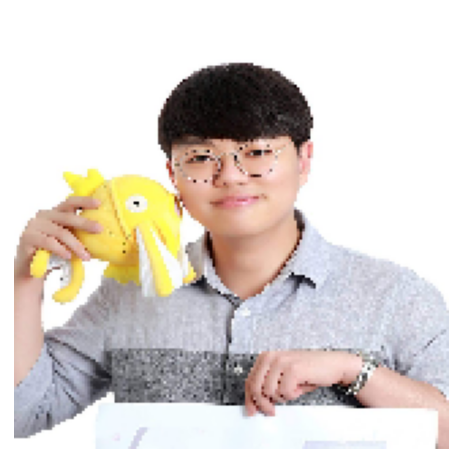

In [115]:
filename = "hmin.jpg"
show_and_predict_image(img_dir_path, filename)
print(img_dir_path, filename)

This image seems 100.0% dog, and 0.0% cat.
/aiffel/aiffel/cat_vs_dog/images cat_face_woman.jpg


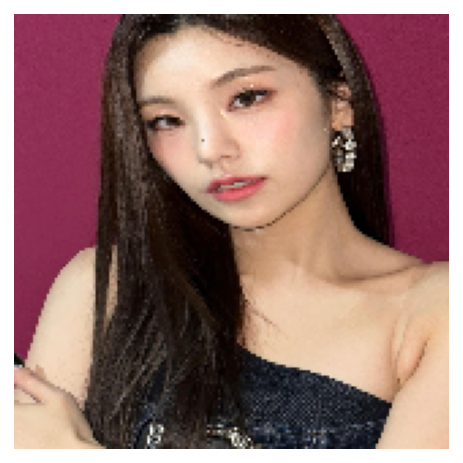

In [116]:
filename = "cat_face_woman.jpg"
show_and_predict_image(img_dir_path, filename)
print(img_dir_path, filename)

A. 아마 동일하게 나왔다면 운이 좋았던 것입니다. 왜 이렇게 좋은 모델이 사람의 얼굴은 강아지상인지 아니면 고양이상인지 잘 맞추지 못하는 것일까요? 답은 데이터에 있습니다.

This image seems 100.0% dog, and 0.0% cat.
/aiffel/aiffel/cat_vs_dog/images 2.jpg


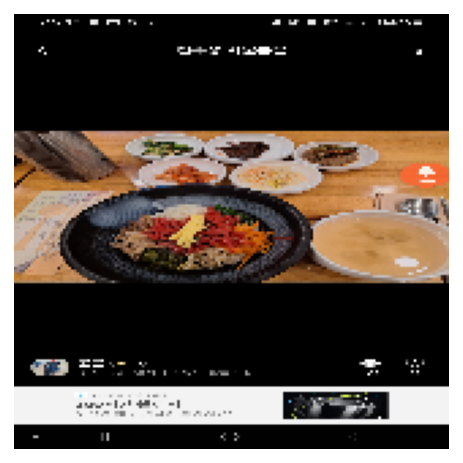

In [119]:
filename = "1.jpg"
show_and_predict_image(img_dir_path, filename)
print(img_dir_path, filename)

This image seems 100.0% dog, and 0.0% cat.
/aiffel/aiffel/cat_vs_dog/images 3.jpg


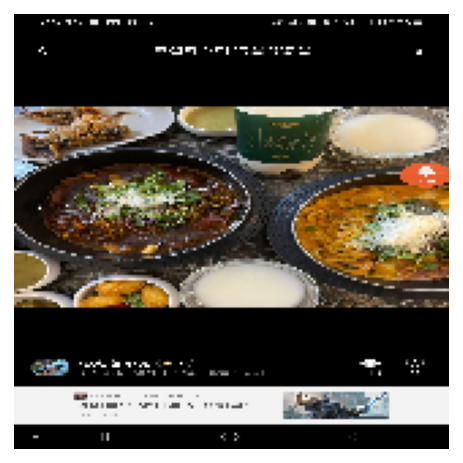

In [120]:
filename = "2.jpg"
show_and_predict_image(img_dir_path, filename)
print(img_dir_path, filename)

This image seems 100.0% dog, and 0.0% cat.
/aiffel/aiffel/cat_vs_dog/images 4.jpg


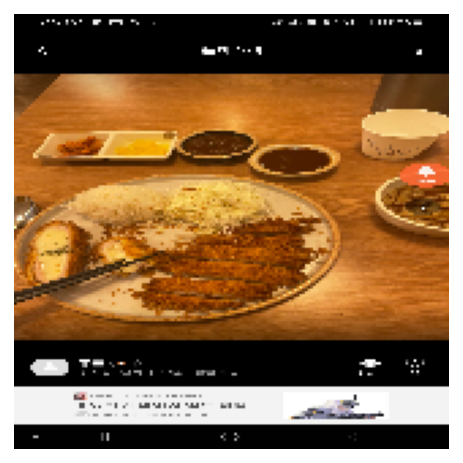

In [121]:
filename = "3.jpg"
show_and_predict_image(img_dir_path, filename)
print(img_dir_path, filename)

아래의 코드는 모든 걸 '개'라고 판별하는 이유에 대해 GPT에게 물어보니 뱉은 내용 일부를 옮겨넣은 것.

In [ ]:
import tensorflow as tf
import numpy as np

# 입력 데이터를 몇 개 준비 (여기선 예제로 사용)
example_images = [image1, image2, image3]  # 이미지 데이터를 리스트로 준비
example_images = tf.convert_to_tensor(example_images, dtype=tf.float32)

# 1. 모델의 로짓 값 확인
logits = model(example_images, training=False)  # 모델의 출력 (Softmax 이전 값)

# 2. Softmax 값 확인
softmax_probs = tf.nn.softmax(logits, axis=-1)

# 3. 클래스별 출력 확인
for i, (logit, prob) in enumerate(zip(logits.numpy(), softmax_probs.numpy())):
    print(f"Image {i+1}:")
    print(f"  Logits: {logit}")  # 로짓 값 출력
    print(f"  Softmax Probabilities: {prob}")  # Softmax 확률 분포 출력
    print(f"  Predicted Class: {np.argmax(prob)} with Probability {np.max(prob)}")

# 4. 데이터 편향 여부 확인 (클래스별 평균 출력값)
average_logits = tf.reduce_mean(logits, axis=0).numpy()
print("\nAverage Logits across all inputs:", average_logits)
print("Class with highest average logit:", np.argmax(average_logits))
